# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns


# Carga de datos

In [2]:
df_approval = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Alumno colaborador/Credit_card_approval/data/application_record.csv")
df_credit = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Alumno colaborador/Credit_card_approval/data/credit_record.csv")

In [3]:
df_approval.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


MONTHS_BALANCE : tiempo, en meses, que ha transcurrido desde la extracción de la información. 0 este mes, 1 hace un mes, etc.

Status:
  - 0: 1-29 días de retraso
  - 1: 30-59 días de retraso
  - 2: 60-89 días de retraso
  - 3: 90-119 días de retraso
  - 4: 120-149 días de retraso
  - 5: Deudas insostenibles, cancelación 
  - C: Deudas pagadas ese mes
  - X: Sin deudas ese mes


In [4]:
df_credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


# Creación de dataset principal

## Modificacion del dataset de crédito

Modificaremos los valores de STATUS X y C canviándolos por 0. De esta manera ampliaremos la categoría cero a "Sin deuda o con deuda inferior a 30 días". De esta manera todas nuestras variables serán numéricas






In [5]:
df_credit["STATUS"] = df_credit["STATUS"].replace(["X"],0)
df_credit["STATUS"] = df_credit["STATUS"].replace(["C"],0)

df_credit["STATUS"] = df_credit["STATUS"].apply(pd.to_numeric) #Pasamos a tipo numércio


Para cada cliente (ID) seleccionamos su STATUS más elevado considerando este valor como su **factor de riesgo** (Varaible a predecir)




In [6]:
df_credit = df_credit.groupby("ID")["STATUS"].max().reset_index()

In [7]:
df_credit.head()

,ID,STATUS
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


## Fusión de los dos datasets

In [8]:
df = pd.merge(df_approval, df_credit, left_on = "ID", right_on= "ID")

df.shape

(36457, 19)

# EDA

In [9]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0


## Distribución de variables de mayor interés

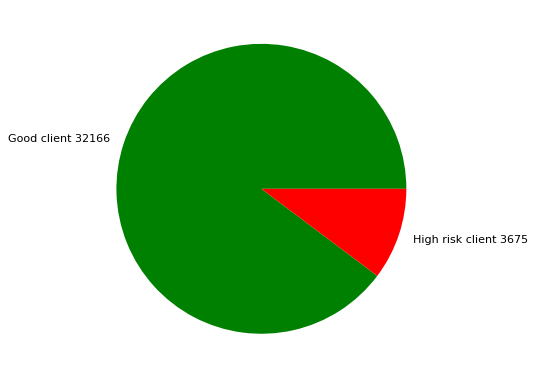

In [10]:
plt.figure(figsize=(8, 6), dpi=80)
clients = [df['STATUS'][df['STATUS'] == 0].shape[0],df['STATUS'][df['STATUS'] == 1].shape[0]]
plt.pie(clients, labels= ["Good client {}".format(clients[0]), "High risk client {}".format(clients[1])], colors= ["green","red"]);

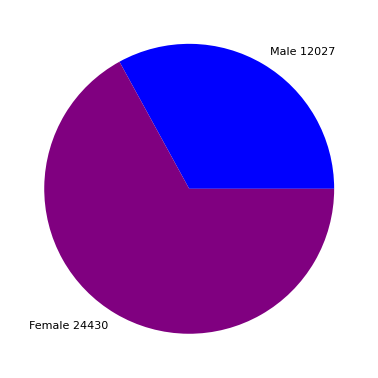

In [11]:
plt.figure(figsize=(8, 6), dpi=80)
code_gender = [df['CODE_GENDER'][df['CODE_GENDER'] == 'M'].shape[0],df['CODE_GENDER'][df['CODE_GENDER'] == 'F'].shape[0]]
plt.pie(code_gender, labels= ["Male {}".format(code_gender[0]), "Female {}".format(code_gender[1])], colors= ["blue","purple"]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'OCCUPATION_TYPE')

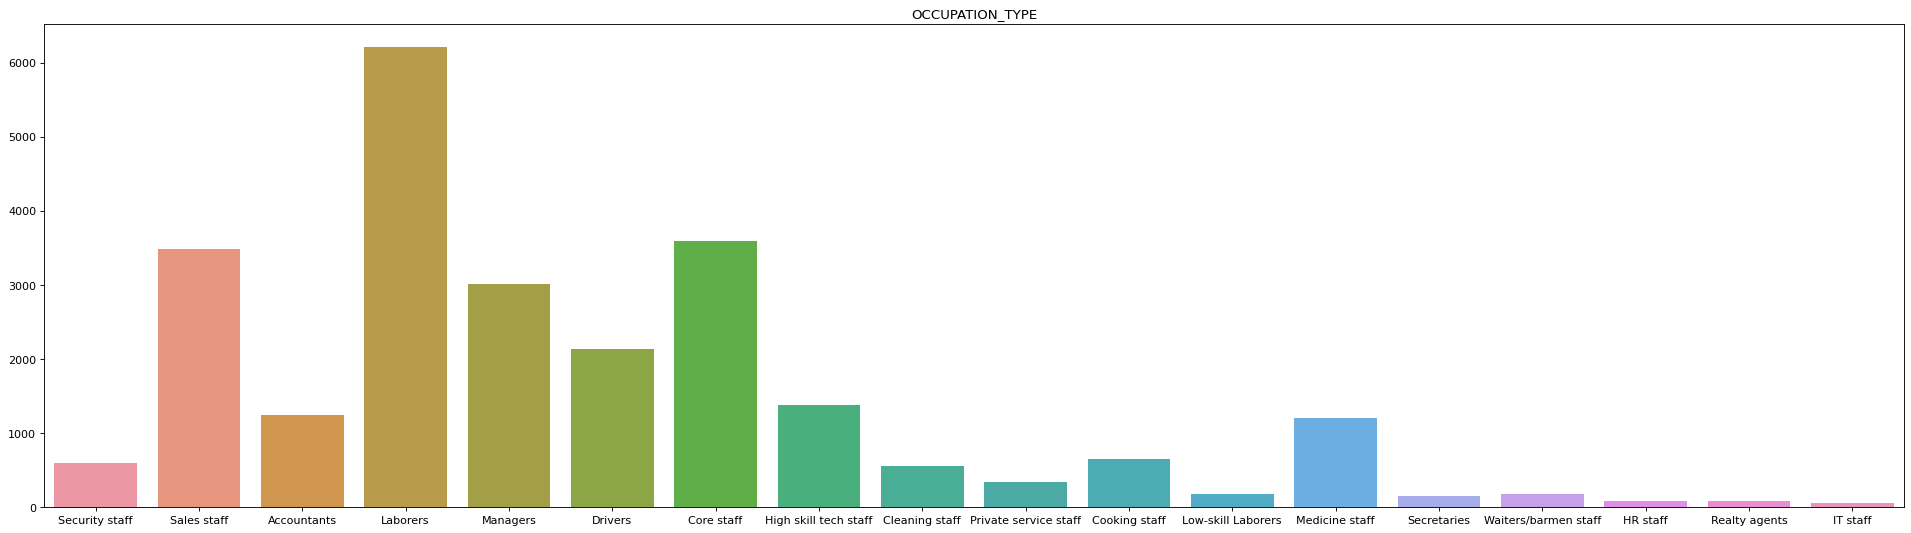

In [12]:
plt.figure(figsize=(30, 8), dpi=80)

jobs = df['OCCUPATION_TYPE'].unique()
job_count = []

for job in jobs:
  job_count.append(df['OCCUPATION_TYPE'][df['OCCUPATION_TYPE'] == job].shape[0])

sns.barplot(jobs,job_count).set_title("OCCUPATION_TYPE")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'NAME_EDUCATION_TYPE')

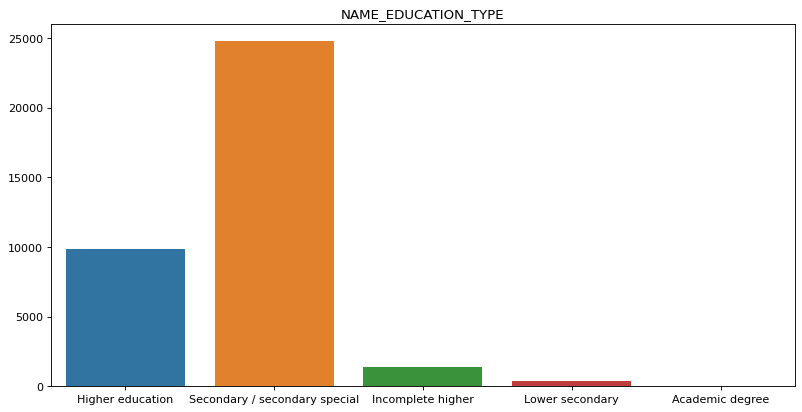

In [13]:
plt.figure(figsize=(12, 6), dpi=80)

jobs = df['NAME_EDUCATION_TYPE'].unique()
job_count = []

for job in jobs:
  job_count.append(df['NAME_EDUCATION_TYPE'][df['NAME_EDUCATION_TYPE'] == job].shape[0])

sns.barplot(jobs,job_count).set_title("NAME_EDUCATION_TYPE")

# Limpieza de datos

In [14]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0


Convertimos la variable a predecir en una  varaible binaria

In [15]:
df["bad_client"] = np.where(df["STATUS"] < 1 , 0,1)

df.drop("STATUS", axis = 1, inplace = True)

In [16]:
df[df["bad_client"] == 1]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,bad_client
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
18,5008825,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,-10669,-1103,1,0,0,0,Accountants,2.0,1
19,5008826,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,-10669,-1103,1,0,0,0,Accountants,2.0,1
20,5008830,F,N,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10031,-1469,1,0,1,0,Laborers,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,1


Eliminamos la variable ID

In [17]:
df.drop("ID", axis = 1, inplace = True)

## Valores nulos

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          36457 non-null  object 
 1   FLAG_OWN_CAR         36457 non-null  object 
 2   FLAG_OWN_REALTY      36457 non-null  object 
 3   CNT_CHILDREN         36457 non-null  int64  
 4   AMT_INCOME_TOTAL     36457 non-null  float64
 5   NAME_INCOME_TYPE     36457 non-null  object 
 6   NAME_EDUCATION_TYPE  36457 non-null  object 
 7   NAME_FAMILY_STATUS   36457 non-null  object 
 8   NAME_HOUSING_TYPE    36457 non-null  object 
 9   DAYS_BIRTH           36457 non-null  int64  
 10  DAYS_EMPLOYED        36457 non-null  int64  
 11  FLAG_MOBIL           36457 non-null  int64  
 12  FLAG_WORK_PHONE      36457 non-null  int64  
 13  FLAG_PHONE           36457 non-null  int64  
 14  FLAG_EMAIL           36457 non-null  int64  
 15  OCCUPATION_TYPE      25134 non-null 

Vemos que la única variable con valores nulos es OCCUPATION_TYPE. Como es una variable interesante para ver posibles sesgos, primeramente eliminaremos todas las filas que tengan esta variable nula. En caso de que no tenga un impacto relevante en el modelo final se podrá reentrenar el modelo eliminando esta columna y añadiendo los valores eliminados

In [19]:
df = df.dropna().reset_index()


## DAYS_BIRTH	DAYS_EMPLOYED
Cambio de días transcurridos a años transcurridos

In [20]:
from math import floor

In [21]:
df["DAYS_BIRTH"].map(lambda x: floor(-x/365))

0        58
1        52
2        52
3        52
4        52
         ..
25129    47
25130    33
25131    33
25132    49
25133    25
Name: DAYS_BIRTH, Length: 25134, dtype: int64

In [22]:
df["YEARS_BIRTH"] = df["DAYS_BIRTH"].map(lambda x: floor(-x/365))
df["YEARS_EMPLOYED"] = df["DAYS_EMPLOYED"].map(lambda x: floor(-x/365))

df.drop(labels = ["DAYS_BIRTH", "DAYS_EMPLOYED"], axis = 1,  inplace = True)

In [23]:
df.head()

,index,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,bad_client,YEARS_BIRTH,YEARS_EMPLOYED
0,2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2.0,0,58,3
1,3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,0,52,8
2,4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,0,52,8
3,5,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,0,52,8
4,6,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,0,52,8


## Codificación para el modelo

Los datos no han sido codificados usando One Hot Encoding debido a que la explicabilidad es más sencilla si se codifica de manera ordinal. Independientemente, los resultados de la predicción no han mejorado notablemente utilizando One Hot

In [25]:
df.head()

df_cat = df.copy()

dct_CODE_GENDER = {'M':1, 'F':0}
dct_yes_no = {'Y':1,'N':0}
dct_NAME_INCOME_TYPE = {'Working': 0, 'Commercial associate': 1, 'State servant': 2, 'Student': 3,'Pensioner': 4}
dct_NAME_EDUCATION_TYPE = {'Secondary / secondary special': 0, 'Higher education':1,'Incomplete higher':2, 'Lower secondary':3, 'Academic degree':4}
dct_NAME_FAMILY_STATUS = {'Married':0, 'Single / not married':1, 'Civil marriage':2, 'Separated':3,'Widow':4}
dct_NAME_HOUSING_TYPE = {'House / apartment':0, 'Rented apartment':1, 'Municipal apartment':2,'With parents':3, 'Co-op apartment':4, 'Office apartment':5}
dct_OCCUPATION_TYPE = {'Security staff':0, 'Sales staff':1, 'Accountants':2, 'Laborers':3,'Managers':4, 'Drivers':5, 'Core staff':6, 'High skill tech staff':7,'Cleaning staff':8, 'Private service staff':9, 'Cooking staff':10,'Low-skill Laborers':11, 'Medicine staff':12, 'Secretaries':13,'Waiters/barmen staff':14, 'HR staff':15, 'Realty agents':16, 'IT staff':17}

df_cat['CODE_GENDER'] = df_cat['CODE_GENDER'].map(dct_CODE_GENDER)
df_cat['FLAG_OWN_CAR'] = df_cat['FLAG_OWN_CAR'].map(dct_yes_no)
df_cat['FLAG_OWN_REALTY'] = df_cat['FLAG_OWN_REALTY'].map(dct_yes_no)
df_cat['NAME_INCOME_TYPE'] = df_cat['NAME_INCOME_TYPE'].map(dct_NAME_INCOME_TYPE)
df_cat['NAME_EDUCATION_TYPE'] = df_cat['NAME_EDUCATION_TYPE'].map(dct_NAME_EDUCATION_TYPE)
df_cat['NAME_FAMILY_STATUS'] = df_cat['NAME_FAMILY_STATUS'].map(dct_NAME_FAMILY_STATUS)
df_cat['NAME_HOUSING_TYPE'] = df_cat['NAME_HOUSING_TYPE'].map(dct_NAME_HOUSING_TYPE)
df_cat['OCCUPATION_TYPE'] = df_cat['OCCUPATION_TYPE'].map(dct_OCCUPATION_TYPE)

In [26]:
df_cat.head()

,index,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,bad_client,YEARS_BIRTH,YEARS_EMPLOYED
0,2,1,1,1,0,112500.0,0,0,0,0,1,0,0,0,0,2.0,0,58,3
1,3,0,0,1,0,270000.0,1,0,1,0,1,0,1,1,1,1.0,0,52,8
2,4,0,0,1,0,270000.0,1,0,1,0,1,0,1,1,1,1.0,0,52,8
3,5,0,0,1,0,270000.0,1,0,1,0,1,0,1,1,1,1.0,0,52,8
4,6,0,0,1,0,270000.0,1,0,1,0,1,0,1,1,1,1.0,0,52,8


In [27]:
df_cat.drop("FLAG_MOBIL", axis = 1, inplace = True) #Observamos que todos los valores son 1

In [28]:
df_cat.shape

(25134, 18)

## Train Test split

In [29]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df_cat.copy()
y = X.pop("bad_client")

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                     test_size=0.25,
                                                    random_state = 186)

X_train, y_train = SMOTE().fit_sample(X_train,y_train)
X_train = pd.DataFrame(X_train, columns = X.columns)



/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Modelo:  XGBoost (tree based model)

In [30]:
from sklearn.model_selection import  RandomizedSearchCV 
from sklearn.metrics import confusion_matrix
from time import time
from xgboost import XGBClassifier,plot_importance
!pip install shap
import shap
import matplotlib.pylab as plb


     |████████████████████████████████| 358kB 7.4MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491631 sha256=22c14e6b32036aadbf8261c6c365dbff176b66060b2d8f494edaf81eb2859062
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


## Training

---

In [32]:
model = XGBClassifier(max_depth= 18,
                    n_estimators=250, #Para mejor resultados con 2000 pero incrementa mucho el coste computacional
                    min_child_weight=8, 
                    subsample=0.8, 
                    learning_rate =0.02,    
                    seed=742,
                    predictor='gpu_predictor')
  
model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.02, max_delta_step=0, max_depth=18,
              min_child_weight=8, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic',
              predictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=742, silent=None,
              subsample=0.8, verbosity=1)

Testing

---

In [33]:
def validation_matrix(labels_real,labels_pred):
  real_0_pred_0 = 0
  real_0_pred_1 = 0
  real_1_pred_0 = 0
  real_1_pred_1 = 0

  for i in range(len(labels_real)):
    if labels_real[i] == 0 and labels_pred[i] == 0:
      real_0_pred_0+=1
    elif labels_real[i] == 0 and labels_pred[i] == 1:
      real_0_pred_1+=1
    elif labels_real[i] == 1 and labels_pred[i] == 0:
      real_1_pred_0+=1
    else:
      real_1_pred_1+=1

  return [[real_0_pred_0,real_0_pred_1],[real_1_pred_0,real_1_pred_1]]
      

def plot_confusion_matrix(values,pred):

  matrix = validation_matrix(values,pred)

  fig, ax1= plt.subplots(1, sharex = True, sharey = False)
  ax1.imshow(matrix, interpolation ='none', aspect = 'auto')
  for (j,i),value in np.ndenumerate(matrix):
      ax1.text(i,j,value,ha='center',va='center')

  plt.show()


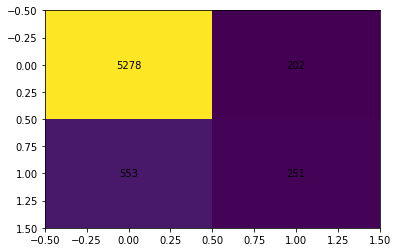

In [34]:
pred = model.predict(X_test)

plot_confusion_matrix(y_test.to_numpy(),pred)

## Explain predictions (With SHAP)

In [35]:
import shap

In [36]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [37]:
def take_higher_and_lower_values(array, n_values):
  index = np.argsort(array)

  high_index = index[0:n_values]
  low_index = index[-n_values:]

  values = np.sort(array)

  high_vals = values[0:n_values]
  low_vals = values[-n_values:]

  return [np.concatenate([high_vals,low_vals]),np.concatenate([high_index,low_index])]

def force_plot_func(X,excepted_value,shap_values, n_elements,element_index):
  values,index = take_higher_and_lower_values(shap_values[element_index,:],n_elements)
  shap.initjs()
  plt.figure(figsize=(200, 60), dpi=80)
  shap.force_plot(excepted_value, values, X.columns[index],matplotlib=True)

<Figure size 16000x4800 with 0 Axes>

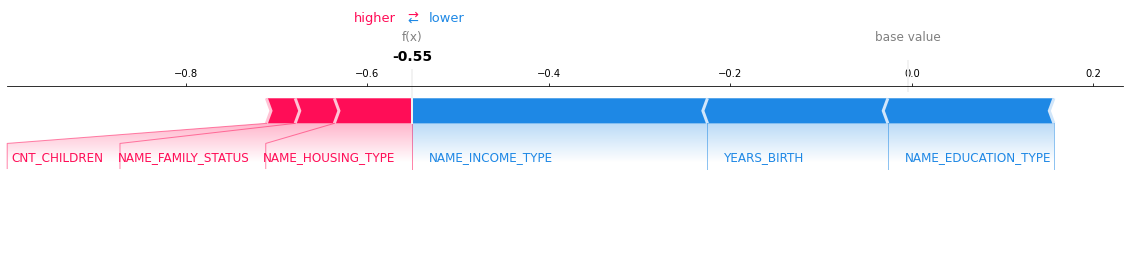

In [38]:
force_plot_func(X,explainer.expected_value,shap_values,3,113)


In [41]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:2000,:], X.iloc[:2000,:])

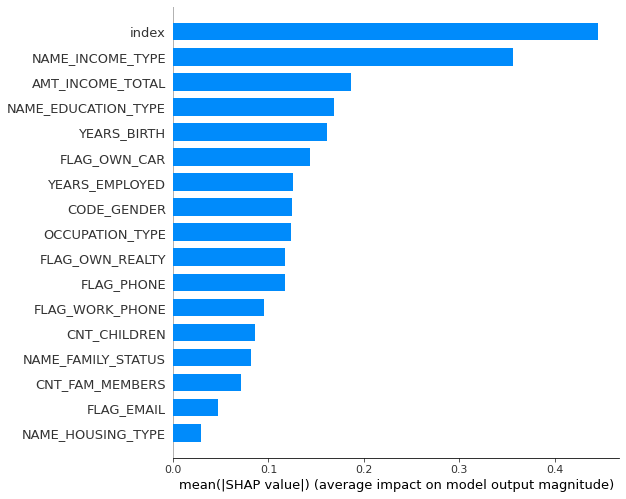

In [42]:
shap.summary_plot(shap_values, X, plot_type="bar")

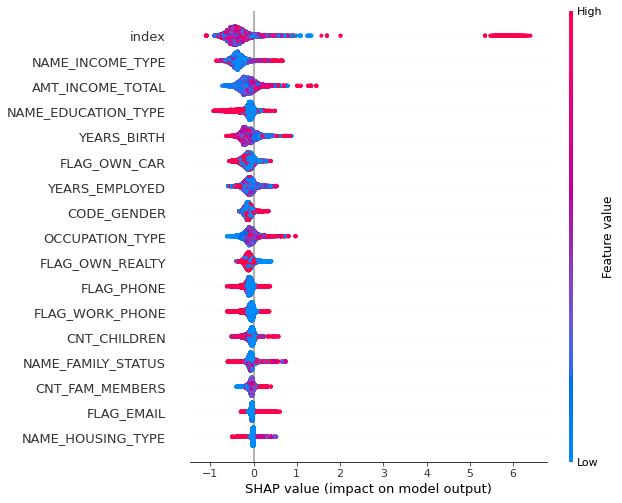

In [43]:
shap.summary_plot(shap_values, X)

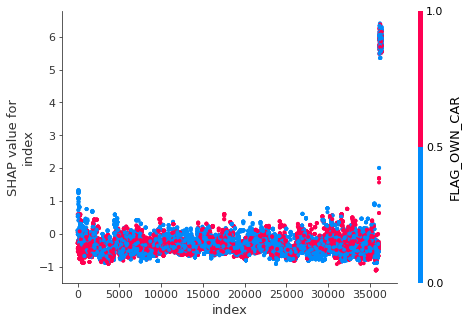

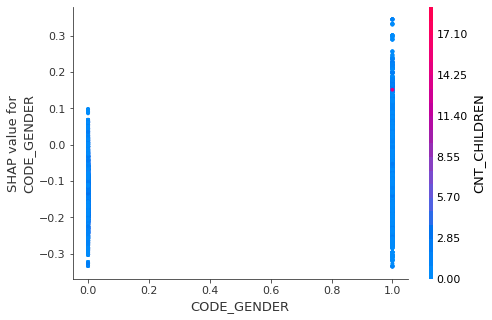

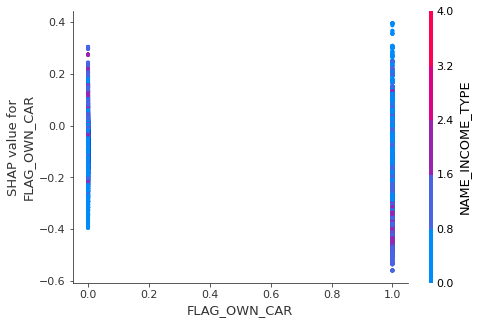

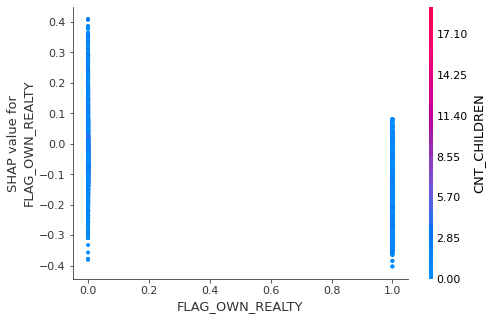

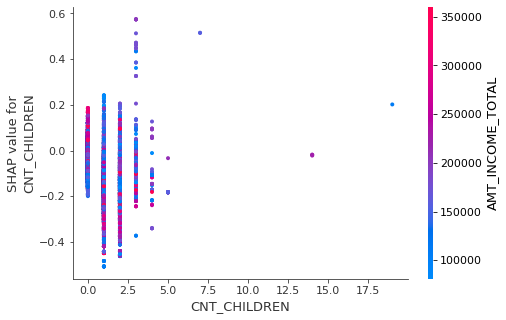

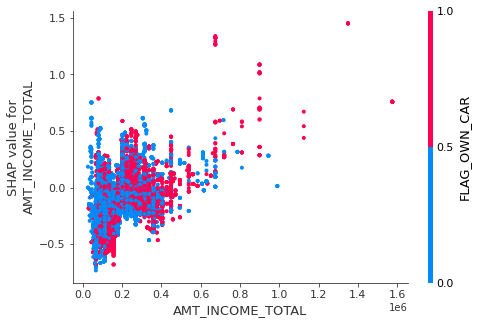

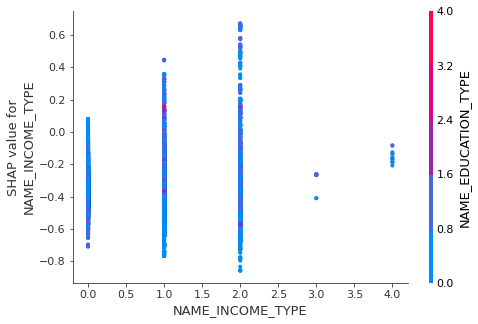

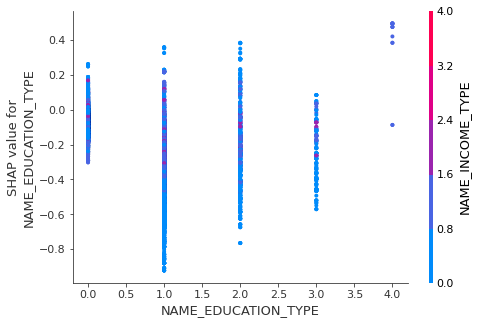

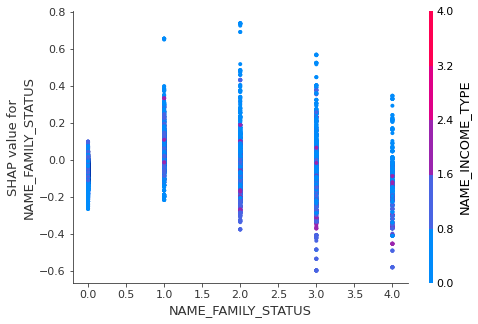

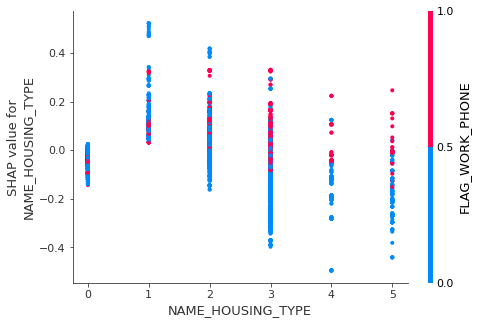

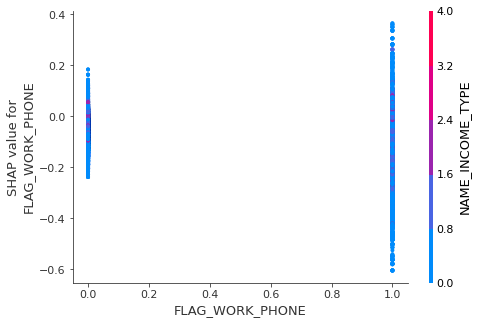

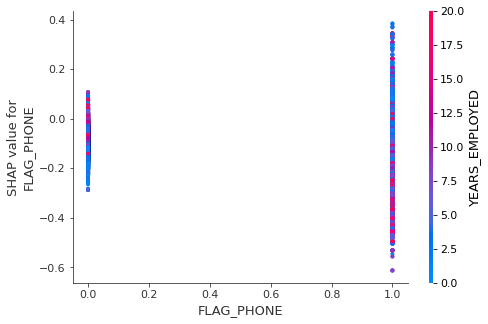

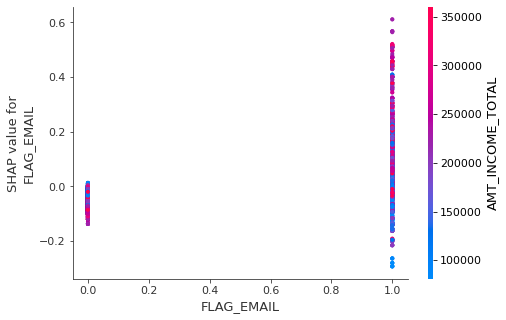

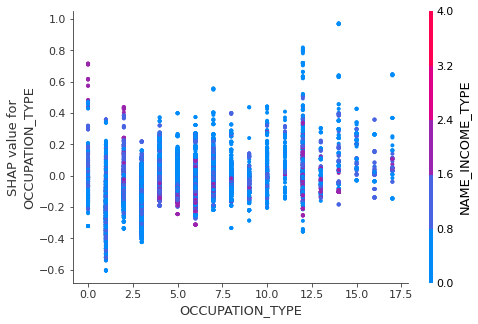

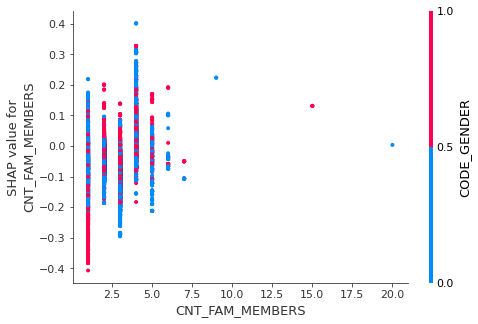

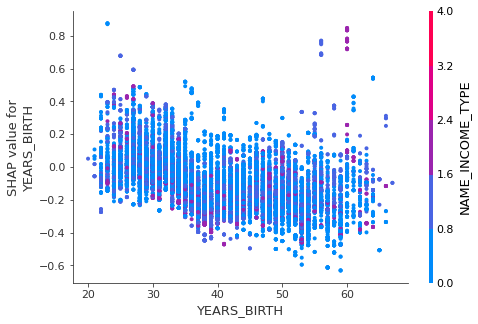

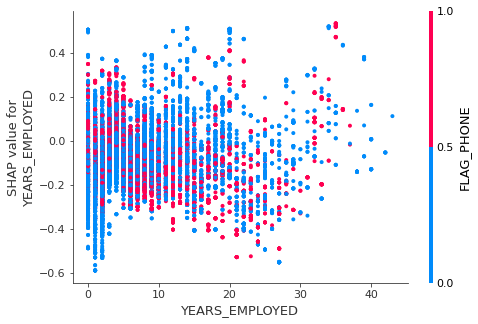

In [44]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X, display_features=X)

In [45]:
def variable_impact(shap_values,X,columns):
  for col,feature in enumerate(columns):
    impact = {}
    for unique in X[feature].unique():
      index = X[X[feature] == unique][feature].index
      mean = 0
      for i in index:
        mean += shap_values[i][col]
      mean = mean/len(index)
      impact[feature] = mean

      print("Feature: {}\t value: {}\t Impact: {}".format(feature,unique,mean))
    print("\n")


In [46]:
cols_impact = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',  'CNT_CHILDREN', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','YEARS_BIRTH','YEARS_EMPLOYED']

variable_impact(shap_values,X,cols_impact)

Feature: CODE_GENDER	 value: 1	 Impact: -0.27743780337982954
Feature: CODE_GENDER	 value: 0	 Impact: -0.3116983970771009


Feature: FLAG_OWN_CAR	 value: 1	 Impact: -0.11222493558291265
Feature: FLAG_OWN_CAR	 value: 0	 Impact: -0.11697688591530425


Feature: FLAG_OWN_REALTY	 value: 1	 Impact: -0.1289654439215783
Feature: FLAG_OWN_REALTY	 value: 0	 Impact: -0.12230210564862938


Feature: CNT_CHILDREN	 value: 0	 Impact: -0.09163065044316399
Feature: CNT_CHILDREN	 value: 3	 Impact: -0.12086504140797143
Feature: CNT_CHILDREN	 value: 1	 Impact: -0.09806309932478986
Feature: CNT_CHILDREN	 value: 2	 Impact: -0.09444164401160392
Feature: CNT_CHILDREN	 value: 4	 Impact: -0.09197769385942242
Feature: CNT_CHILDREN	 value: 14	 Impact: -0.04799665634830793
Feature: CNT_CHILDREN	 value: 5	 Impact: -0.12707574903551075
Feature: CNT_CHILDREN	 value: 19	 Impact: -0.1187465637922287
Feature: CNT_CHILDREN	 value: 7	 Impact: 0.25363415479660034


Feature: NAME_EDUCATION_TYPE	 value: 0	 Impact: -0.072670046